# Churn problem 

A bank is investigating a very high rate of customer leaving the bank. Here is a 10.000 records dataset to investigate and predict which of the customers are more likely to leave the bank soon.

In [1]:
# Importing the necessary packages
import numpy as np                                  # "Scientific computing"
import scipy.stats as stats                         # Statistical tests

import pandas as pd                                 # Data Frame
from pandas.api.types import CategoricalDtype

import matplotlib.pyplot as plt                     # Basic visualisation
import seaborn as sns                               # Advanced data visualisation

%matplotlib inline

Read the file Churn_Modelling.csv.  
Show the first few records.

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/jdecorte/ai_ml/main/datasets/churn_modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


What are the dimensions of the datasets?

In [3]:
print("Shape of DF:", df.shape)

Shape of DF: (10000, 14)


Is this a skewed dataset?

In [4]:
df['Exited'].value_counts(normalize=True)

0    0.7963
1    0.2037
Name: Exited, dtype: float64

Drop the columns RowNumber, CustomerId and Surname

In [5]:
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis = 1)

What are the different values for Geography?

In [6]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

Use one-hot encoding to replace Gender and Geography.

In [7]:
df = pd.get_dummies(df,prefix=['Geography'], columns = ['Geography'])
df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,Female,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,Female,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,Female,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,Female,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,Female,43,2,125510.82,1,1,1,79084.10,0,0,0,1


In [8]:
df = pd.get_dummies(df,prefix=['Gender'], columns = ['Gender'])
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0


Make sure you understand this function. We will use is later on to evaluate the ANN.

In [9]:
def plot_history(history):
  plt.figure(figsize = (12,4))
  plt.subplot(1,2,1)

  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.plot(history.epoch, np.array(history.history['accuracy']),'g-',
           label='Train accuracy')
  plt.plot(history.epoch, np.array(history.history['val_accuracy']),'r-',
           label = 'Validation accuracy')
  plt.legend()

  plt.subplot(1,2,2)
  plt.xlabel('Epoch')
  plt.ylabel('Loss minimised by model')
  plt.plot(history.epoch, np.array(history.history['loss']),'g-',
           label='Train loss')
  plt.plot(history.epoch, np.array(history.history['val_loss']),'r-',
           label = 'Validation loss')
  plt.legend()

What is X and what is y?

In [10]:
X = df.drop(["Exited"], axis = 1)
y = df['Exited']   

What is X_train, y_train, X_test, y_test?

In [11]:
from sklearn.model_selection import train_test_split    
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  

What is X_train, y_train, X_val, y_val?

In [12]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)  

What are the dimensions of X_train, X_val, X_test, y_train, y_val, y_test?

In [13]:
print("Shape of x_train:", X_train.shape)
print("Shape of x_test:", X_test.shape)
print("Shape of x_val:", X_val.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)
print("Shape of y_val:", y_val.shape)

Shape of x_train: (6400, 13)
Shape of x_test: (2000, 13)
Shape of x_val: (1600, 13)
Shape of y_train: (6400,)
Shape of y_test: (2000,)
Shape of y_val: (1600,)


Standardize the data before providing it as training data.  
You should only use the training data to fit the scaler transformation
and use the same fitted object to transform the validation and test input
data.

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [53]:
# reset the model
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

* First create a small ANN model.  
* Add BatchNormalization
* Add Dropout
* Evaluate the results after each fine tuning.


In [54]:
import tensorflow as tf
from tensorflow import keras
model = keras.models.Sequential()

model.add(keras.layers.Dense(64, activation="relu", input_dim = X_train_scaled.shape[1]))
model.add(keras.layers.Dropout(rate=0.2))

model.add(keras.layers.Dense(32, activation="relu"))
model.add(keras.layers.Dropout(rate=0.2))

model.add(keras.layers.Dense(1, activation="sigmoid"))

In [55]:
model.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [56]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,
                                                  restore_best_weights=True)

history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32,
                    validation_data=(X_val_scaled, y_val),callbacks=[early_stopping_cb])

Epoch 1/100
200/200 [==============================] - 0s 1ms/step - loss: 0.4835 - accuracy: 0.7933 - val_loss: 0.4093 - val_accuracy: 0.8194
Epoch 2/100
200/200 [==============================] - 0s 825us/step - loss: 0.4329 - accuracy: 0.8170 - val_loss: 0.3913 - val_accuracy: 0.8350
Epoch 3/100
200/200 [==============================] - 0s 749us/step - loss: 0.4147 - accuracy: 0.8316 - val_loss: 0.3712 - val_accuracy: 0.8475
Epoch 4/100
200/200 [==============================] - 0s 755us/step - loss: 0.3963 - accuracy: 0.8342 - val_loss: 0.3578 - val_accuracy: 0.8569
Epoch 5/100
200/200 [==============================] - 0s 727us/step - loss: 0.3788 - accuracy: 0.8445 - val_loss: 0.3502 - val_accuracy: 0.8575
Epoch 6/100
200/200 [==============================] - 0s 738us/step - loss: 0.3746 - accuracy: 0.8470 - val_loss: 0.3444 - val_accuracy: 0.8637
Epoch 7/100
200/200 [==============================] - 0s 749us/step - loss: 0.3709 - accuracy: 0.8472 - val_loss: 0.3385 - val_accu

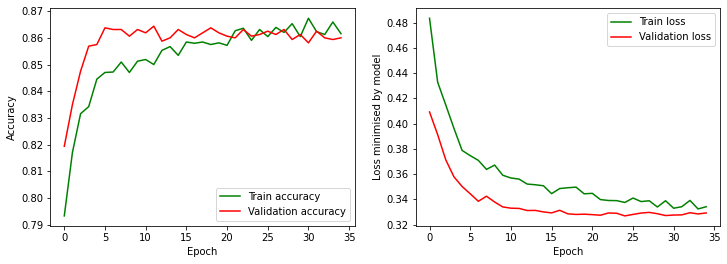

In [58]:
plot_history(history)

In [57]:
model.evaluate(X_test_scaled, y_test)

63/63 [==============================] - 0s 643us/step - loss: 0.3371 - accuracy: 0.8655


[0.33706730604171753, 0.8654999732971191]